In [61]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder , RobustScaler , QuantileTransformer , StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix , classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pylab as plt
from scipy import stats
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.model_selection import GridSearchCV
import joblib

In [62]:
df = pd.read_csv('/Users/raidneghiz/Documents/Loan approval/loan_data.csv')
df.head()

person_age person_gender person_education  person_income  person_emp_exp  \
0        22.0        female           Master        71948.0               0   
1        21.0        female      High School        12282.0               0   
2        25.0        female      High School        12438.0               3   
3        23.0        female         Bachelor        79753.0               0   
4        24.0          male           Master        66135.0               1   

  person_home_ownership  loan_amnt loan_intent  loan_int_rate  \
0                  RENT    35000.0    PERSONAL          16.02   
1                   OWN     1000.0   EDUCATION          11.14   
2              MORTGAGE     5500.0     MEDICAL          12.87   
3                  RENT    35000.0     MEDICAL          15.23   
4                  RENT    35000.0     MEDICAL          14.27   

   loan_percent_income  cb_person_cred_hist_length  credit_score  \
0                 0.49                         3.0           561   
1                 0.08                         2.0           504   
2                 0.44                         3.0           635   
3                 0.44                         2.0           675   
4                 0.53                         4.0           586   

  previous_loan_defaults_on_file  loan_status  
0                             No            1  
1                            Yes            0  
2                             No            1  
3                             No            1  
4                             No            1

In [63]:
df.shape

(45000, 14)

In [64]:
df['person_education'].unique()

array(['Master', 'High School', 'Bachelor', 'Associate', 'Doctorate'],
      dtype=object)

In [65]:
df['person_home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

In [66]:
df['loan_intent'].unique()

array(['PERSONAL', 'EDUCATION', 'MEDICAL', 'VENTURE', 'HOMEIMPROVEMENT',
       'DEBTCONSOLIDATION'], dtype=object)

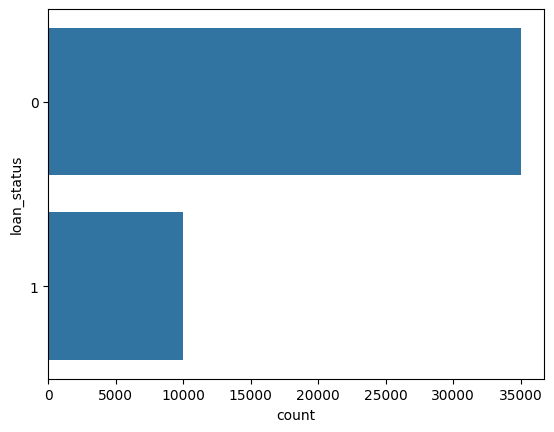

In [67]:
plot = sns.countplot(df , y= df['loan_status'])

#### **NOTE**
The dataset is imbalanced, as there are more instances with the value 'REJECTED' compared to 'APPROVED'

In [68]:
df1 = df.copy()

In [69]:
encoder = LabelEncoder()
df1['person_gender'] = encoder.fit_transform(df['person_gender'])
df1['person_education'] = encoder.fit_transform(df['person_education'])
df1['person_home_ownership'] = encoder.fit_transform(df['person_home_ownership'])
df1['loan_intent'] = encoder.fit_transform(df['loan_intent'])
df1['previous_loan_defaults_on_file'] = encoder.fit_transform(df['previous_loan_defaults_on_file'])

In [70]:
df1

person_age  person_gender  person_education  person_income  \
0            22.0              0                 4        71948.0   
1            21.0              0                 3        12282.0   
2            25.0              0                 3        12438.0   
3            23.0              0                 1        79753.0   
4            24.0              1                 4        66135.0   
...           ...            ...               ...            ...   
44995        27.0              1                 0        47971.0   
44996        37.0              0                 0        65800.0   
44997        33.0              1                 0        56942.0   
44998        29.0              1                 1        33164.0   
44999        24.0              1                 3        51609.0   

       person_emp_exp  person_home_ownership  loan_amnt  loan_intent  \
0                   0                      3    35000.0            4   
1                   0                      2     1000.0            1   
2                   3                      0     5500.0            3   
3                   0                      3    35000.0            3   
4                   1                      3    35000.0            3   
...               ...                    ...        ...          ...   
44995               6                      3    15000.0            3   
44996              17                      3     9000.0            2   
44997               7                      3     2771.0            0   
44998               4                      3    12000.0            1   
44999               1                      3     6665.0            0   

       loan_int_rate  loan_percent_income  cb_person_cred_hist_length  \
0              16.02                 0.49                         3.0   
1              11.14                 0.08                         2.0   
2              12.87                 0.44                         3.0   
3              15.23                 0.44                         2.0   
4              14.27                 0.53                         4.0   
...              ...                  ...                         ...   
44995          15.66                 0.31                         3.0   
44996          14.07                 0.14                        11.0   
44997          10.02                 0.05                        10.0   
44998          13.23                 0.36                         6.0   
44999          17.05                 0.13                         3.0   

       credit_score  previous_loan_defaults_on_file  loan_status  
0               561                               0            1  
1               504                               1            0  
2               635                               0            1  
3               675                               0            1  
4               586                               0            1  
...             ...                             ...          ...  
44995           645                               0            1  
44996           621                               0            1  
44997           668                               0            1  
44998           604                               0            1  
44999           628                               0            1  

[45000 rows x 14 columns]

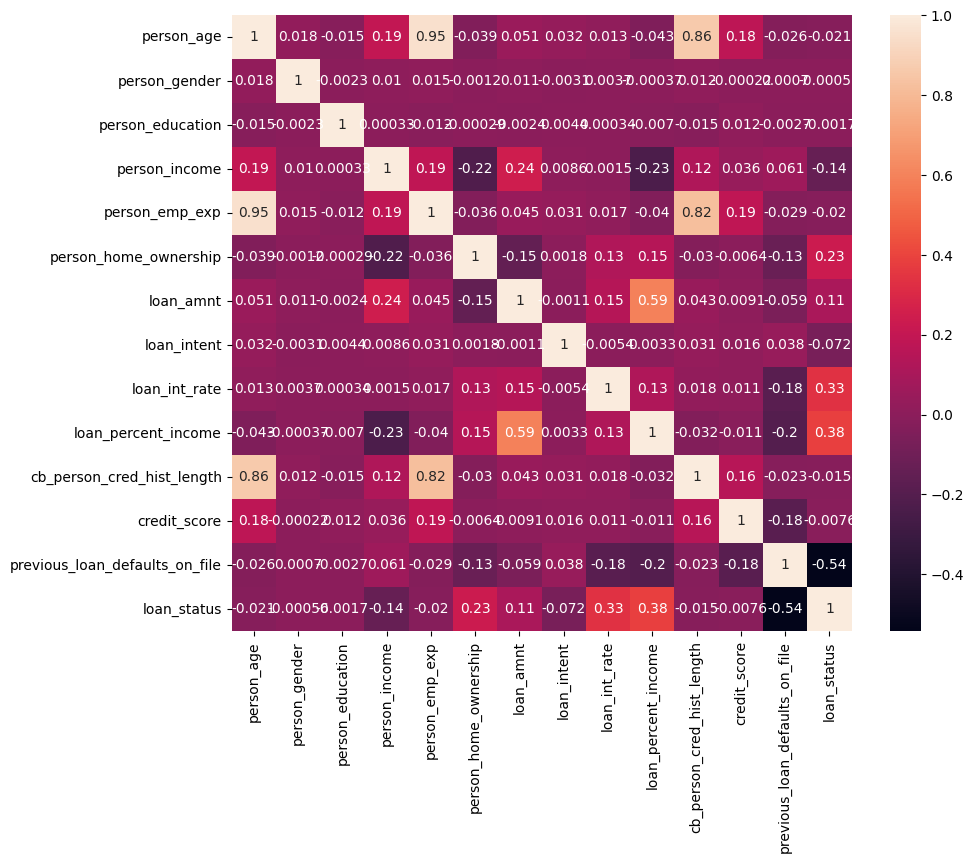

In [71]:
correlations = df1.corr()
plt.figure(figsize=(10, 8))  
sns.heatmap(correlations, annot=True)  
plt.show()

In [72]:
def plots(df):
    figure = make_subplots(2,7)
    for i , column in enumerate(df.columns) :
        row = (i//7)+1
        col = (i%7)+1
        figure.add_trace(go.Box(y=df[column] , name= column) , row= row , col= col)
    figure.update_layout(width = 1000 , showlegend = False)
    figure.show()

plots(df1)

In [73]:
#df2 = df1.copy()

In [74]:
#def removing_outliers(df , column_name) : 
#   Q1 = df[column_name].quantile(0.25)
#   Q3 = df[column_name].quantile(0.75)
#   IQR = Q3-Q1
#   min_boundry = Q1 - 1.5*IQR
#   max_boundry = Q3 + 1.5 * IQR
#   return min_boundry , max_boundry


#for column in df2.columns : 
#   minimum_boundry , maximum_boundry = removing_outliers(df2 , column)
#   df2 = df2[(df2[column] >= minimum_boundry) & (df2[column] <= maximum_boundry)]

In [75]:
#df2.shape

#### **NOTE**
WHEN REMOVING OUTLIERS , WE LOST MORE THAN 11000 OBSERVATION WHICH IS A LOSS OF INFORMATION ! 
I WILL LEAVE OUTLIERS AND TRY TO FIT SOME MODELS

In [76]:
x = df1.drop(columns='loan_status')
y = df1['loan_status']

#### **SCALING THE DATA**

In [77]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [78]:
x=pd.DataFrame(x,columns=['person_age'	,'person_gender',	'person_education' ,	'person_income' , 
                          	'person_emp_exp',	'person_home_ownership',	'loan_amnt'	,'loan_intent'	,
                            'loan_int_rate',	'loan_percent_income'	,'cb_person_cred_hist_length'	,
                            'credit_score'	,'previous_loan_defaults_on_file'	])

**SPLITING THE DATA**

In [79]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2 , random_state=42)
x_train.shape , x_test.shape , y_train.shape , y_test.shape

((36000, 13), (9000, 13), (36000,), (9000,))

#### **CHOOSING THE BEST MODEL**

**LOGISTIC REGRESSION**

In [80]:
log_reg = LogisticRegression()
log_reg.fit(x_train , y_train)

LogisticRegression()

In [81]:
y_pred = log_reg.predict(x_test)

In [82]:
logistic_regression_accuracy = accuracy_score(y_test , y_pred)
logistic_regression_accuracy

0.8901111111111111

**DECISION TREE**

In [83]:
decision_tree = DecisionTreeClassifier(max_depth=10)
decision_tree.fit(x_train , y_train)

DecisionTreeClassifier(max_depth=10)

In [84]:
y_pred = decision_tree.predict(x_test)

In [85]:
decision_tree_accuracy = accuracy_score(y_test , y_pred)
decision_tree_accuracy

0.914

**GRID SEARCH FOR DECISION TREE**

In [86]:
dt_params = {
    'criterion': ['gini', 'entropy'],       
    'max_depth': [3, 5, 10, None],          
    'min_samples_split': [2, 5, 10],        
    'min_samples_leaf': [1, 2, 5]           
}

dt = DecisionTreeClassifier(random_state=42)
dt_grid = GridSearchCV(dt, dt_params, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
dt_grid.fit(x_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, None],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy', verbose=1)

In [87]:
best_dt_model = dt_grid.best_estimator_

In [90]:
y_pred = best_dt_model.predict(x_test)

In [92]:
best_dt_model_accuracy =accuracy_score(y_test , y_pred)
best_dt_model_accuracy

0.914

 **RANDOM FOREST**

In [ ]:
random_forest = RandomForestClassifier(n_estimators=18)
random_forest.fit(x_train , y_train)

RandomForestClassifier(n_estimators=18)

In [ ]:
y_pred = random_forest.predict(x_test)

In [ ]:
random_forest_accuracy = accuracy_score(y_test , y_pred)
random_forest_accuracy

0.924

**GRID SEARCH FOR RANDOM FOREST**

In [98]:
rf_params = {
   'n_estimators': [18 ,50, 100, 200],         
   'max_depth': [3, 5, 10, None],                   
   'criterion': ['gini', 'entropy']        
}

rf = RandomForestClassifier( random_state=42)
rf_grid = GridSearchCV(rf, rf_params, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
rf_grid.fit(x_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, None],
                         'n_estimators': [18, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [99]:
best_rf_model = rf_grid.best_estimator_

In [100]:
y_pred = best_rf_model.predict(x_test)

In [101]:
best_rf_model_accuracy = accuracy_score(y_test , y_pred)
best_rf_model_accuracy

0.9281111111111111

**KNN**

In [ ]:
knn = KNeighborsClassifier(n_neighbors=18 ,n_jobs=-1)
knn.fit(x_train , y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=18)

In [ ]:
y_pred = knn.predict(x_test)

In [ ]:
knn_accuracy = accuracy_score(y_test , y_pred)
knn_accuracy

0.8925555555555555

**GRID SEARCH FOR KNN**

In [103]:
knn_params = {
    'n_neighbors': [3, 5, 7, 9],                 
    'metric': ['euclidean', 'manhattan']    
}

knn = KNeighborsClassifier()
knn_grid = GridSearchCV(knn, knn_params, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
knn_grid.fit(x_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9]},
             scoring='accuracy', verbose=1)

In [104]:
best_knn_model = knn_grid.best_estimator_

In [106]:
y_pred = best_knn_model.predict(x_test)

In [107]:
best_knn_model_accuracy = accuracy_score(y_test , y_pred)
best_knn_model_accuracy

0.9

#### **THE BEST MODEL**

THE BEST MODEL IS RANDOM FOREST AFTER DOING THE GRID SEARCH 
THE ACCURACY OF THE MODEL IS 92.8%

In [108]:
joblib.dump(best_rf_model , 'loan_prediction_model.pkl')

['loan_prediction_model.pkl']